### First I check the datasets (DaNewsroom & CNN/DM) ROUGE score
As the datasets are too big to check fully, a subset of each dataset will be evaluated

In [7]:
from rouge import Rouge
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

rouge = Rouge()

#### Starting with DaNewsroom
We randomly sample 10k entries

In [8]:
df = pd.read_csv('../../data/raw/danewsroom.csv')

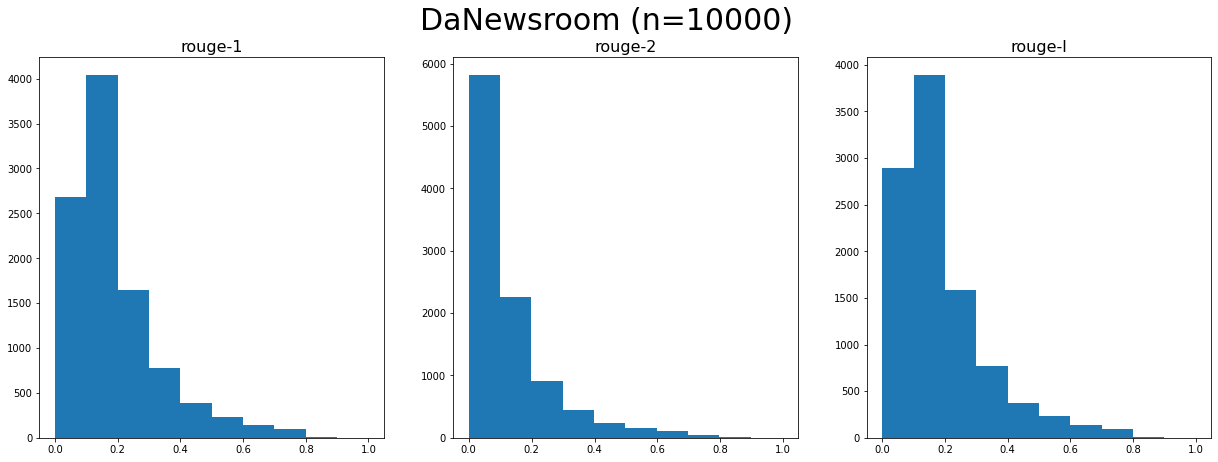

In [3]:
subset = df.sample(n=10000)
scores = rouge.get_scores(subset.summary, subset.text)

fig, axs = plt.subplots(1, 3)
axs = axs.flatten()
fig.suptitle("DaNewsroom (n=10000)", size=30)
fig.set_size_inches(21, 7)

for i, metric in enumerate(['rouge-1', 'rouge-2', 'rouge-l']):
    foo = [ele[metric]['f'] for ele in scores]
    axs[i].hist(foo)
    axs[i].set_title(metric, size=16)
plt.show()

#### Next, I move onto CNN
Since this dataset is split into chunks of 1000, we randomly sample 10 chunks for evaluation

Used 9990 number of files


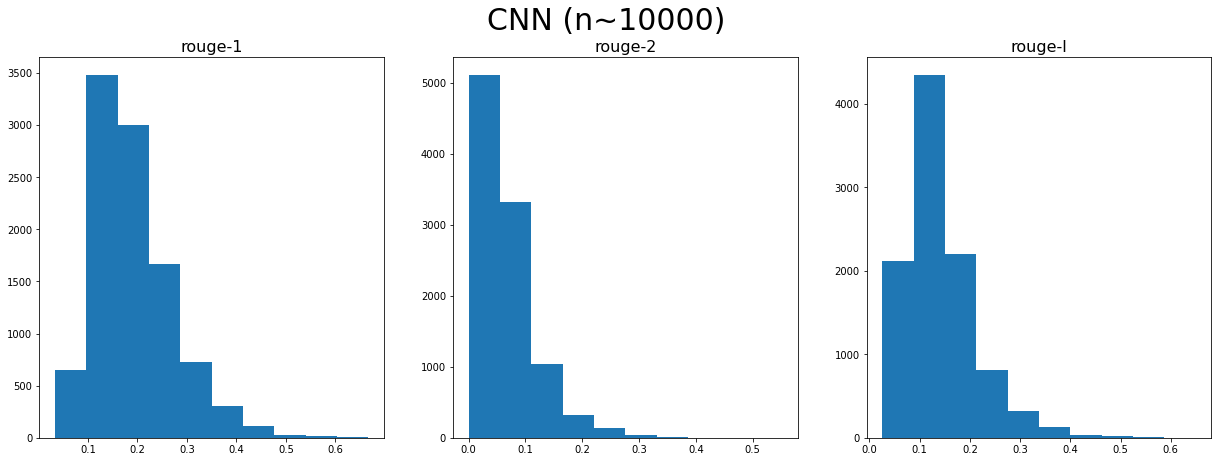

In [4]:
files = np.random.choice(os.listdir('../../data/processed/cnn'), 10)

fig, axs = plt.subplots(1, 3)
axs = axs.flatten()
fig.suptitle("CNN (n~10000)", size=30)
fig.set_size_inches(21, 7)

num_files = 0
for i, metric in enumerate(['rouge-1', 'rouge-2', 'rouge-l']):
    metrics = []
    for file in files:
        with open(f'../../data/processed/cnn/{file}', 'rb') as f:
            dic = pickle.load(f)
        stories, highlights = dic.values()
        scores = rouge.get_scores(stories, highlights)
        metrics += [ele[metric]['f'] for ele in scores]
        if i == 0:
            num_files += len(dic['story'])
    axs[i].hist(metrics)
    axs[i].set_title(metric, size=16)
print(f'Used {num_files} number of files')
plt.show()

And the same is done for the DailyMail

Used 10000 number of files


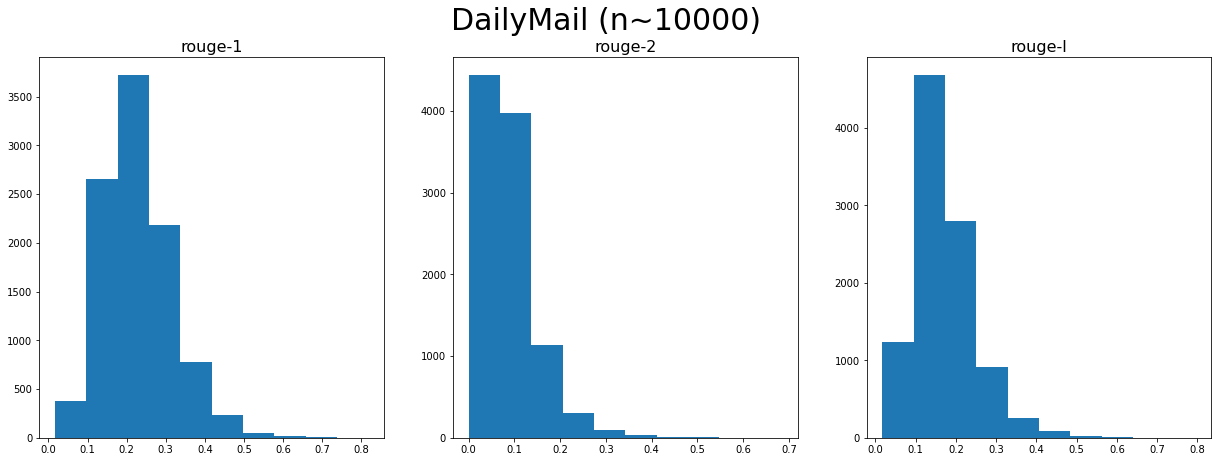

In [5]:
files = np.random.choice(os.listdir('../../data/processed/dailymail'), 10)

fig, axs = plt.subplots(1, 3)
axs = axs.flatten()
fig.suptitle("DailyMail (n~10000)", size=30)
fig.set_size_inches(21, 7)

num_files = 0
for i, metric in enumerate(['rouge-1', 'rouge-2', 'rouge-l']):
    metrics = []
    for file in files:
        with open(f'../../data/processed/dailymail/{file}', 'rb') as f:
            dic = pickle.load(f)
        stories, highlights = dic.values()
        scores = rouge.get_scores(stories, highlights)
        metrics += [ele[metric]['f'] for ele in scores]
        if i == 0:
            num_files += len(dic['story'])
    axs[i].hist(metrics)
    axs[i].set_title(metric, size=16)
print(f'Used {num_files} number of files')
plt.show()

# Next we investigate various other features such as average length

Starting with DaNewsroom

In [6]:
print("Average number of tokens for text:", df.text.str.split(" ").apply(len).mean())
print("Average number of tokens for summary:", df.summary.str.split(" ").apply(len).mean())

Average number of tokens for text: 335.40841450861365
Average number of tokens for summary: 21.755684035263354


The CNN/DailyMail dataset has an average of

|                | Train   | Validation | Test   |
|----------------|---------|------------|--------|
| Samples        | 287,113 | 13,368     | 11,490 |
| Article length | 749     | 769        | 778    |
| Summary length | 55      | 61         | 58     |